<a href="https://colab.research.google.com/github/dexterdev/Machine_Learning_Experiments/blob/master/CNN_fashion_MNIST/main_CNN_FMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')


#file = files.upload()

import gzip
import numpy as np


def training_images():
    with gzip.open('/content/gdrive/My Drive/ML_DL/Assignment1/train-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images

def training_labels():
    with gzip.open('/content/gdrive/My Drive/ML_DL/Assignment1/train-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
#file = files.upload()
def testing_images():
    with gzip.open('/content/gdrive/My Drive/ML_DL/Assignment1/t10k-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images

def testing_labels():
    with gzip.open('/content/gdrive/My Drive/ML_DL/Assignment1/t10k-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

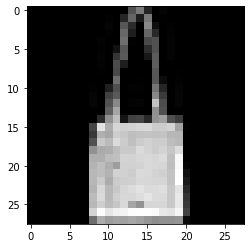

In [14]:
def one_hot(val):
      b = np.zeros((val.size, val.max()+1))
      b[np.arange(val.size),val] = 1
      return b

X_train=training_images()
X_label=one_hot(training_labels())
Y_test=testing_images()
Y_label=one_hot(testing_labels())

#X_train=np.reshape(X_train,(28,28,6000))
#Y_test=np.reshape(Y_test,(28,28,10000))
XX_train=np.zeros((28,28,6000),dtype=np.uint8)
for ii in range(6000):
      XX_train[:,:,ii]=X_train[ii,:,:]
#print(np.shape(X_train))
#print(XX_train[:,:,0])
import matplotlib.pyplot as plt
plt.imshow(XX_train[:,:,200], cmap='gray')


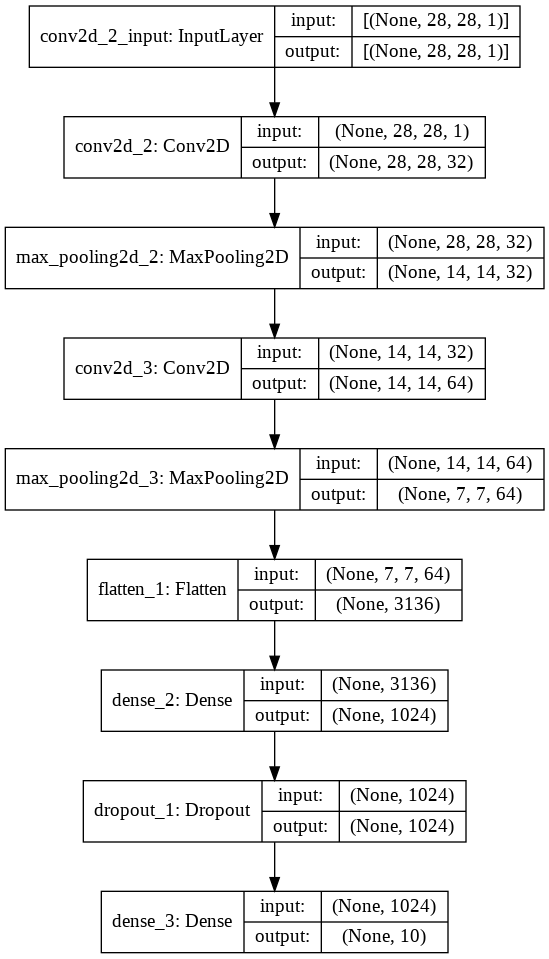

In [15]:
#Required Imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout


classifier = Sequential() 
#Input layer
classifier.add(Conv2D(32, (5, 5), padding="same", input_shape=[ 28, 28, 1]))
#hidden
classifier.add(MaxPool2D((2,2)))
classifier.add(Conv2D(64, (5, 5), padding="same"))
classifier.add(MaxPool2D((2,2)))
classifier.add(Flatten())
classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dropout(0.5))
#output
classifier.add(Dense(units = 10, activation = 'softmax'))



#What does the model look like
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='model.png',show_shapes=True)

In [16]:
opt = keras.optimizers.RMSprop(learning_rate=0.001)
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy')

In [17]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [8]:
X_train = X_train.reshape([-1, 28, 28, 1])
Y_test = Y_test.reshape([-1, 28, 28, 1])
X_train = X_train/255
Y_test = Y_test/255
classifier.fit(X_train, X_label, batch_size = 16, epochs = 10)

Epoch 1/10
3750/3750 [==============================] - 57s 4ms/step - loss: 0.5343
Epoch 2/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.3435
Epoch 3/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.3392
Epoch 4/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.3449
Epoch 5/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.3572
Epoch 6/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.3731
Epoch 7/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.3870
Epoch 8/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.3964
Epoch 9/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.4275
Epoch 10/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.4346


In [9]:
Y_pred = classifier.predict(Y_test)
print(Y_pred[0])

[3.0140992e-32 2.0820129e-27 4.6828202e-28 1.1006397e-27 6.4184567e-28
 2.3180346e-14 3.5760592e-30 1.2743291e-12 4.2279801e-27 1.0000000e+00]


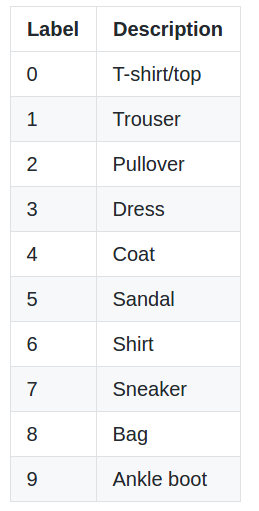

5


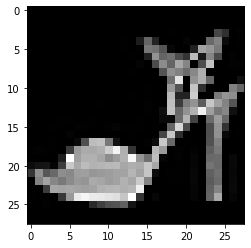

In [10]:
# Check the code: You can change the value of n from 0 to 9999 and verify if the right index for item(label) comes up. 
# See above table for labels of items
n=7754
print(max(range(len(Y_pred[n])), key=Y_pred[n].__getitem__))   
plt.imshow(255*Y_test[n,:,:,-1], cmap='gray')



In [11]:
Y_out_label=np.empty((10000))
Y_real_label=np.empty((10000))
for ii in range(10000):
      Y_out_label[ii]=max(range(len(Y_pred[ii])), key=Y_pred[ii].__getitem__)
      Y_real_label[ii]=max(range(len(Y_label[ii])), key=Y_label[ii].__getitem__)
#Accuracy
diff=np.count_nonzero(Y_real_label-Y_out_label)
print('The overall accuracy of CNN =',100*(1 - diff/10000),'%')

from sklearn.metrics import classification_report, confusion_matrix
#confusion matrix
print('The confusion matrix =')
cm=confusion_matrix(Y_real_label,Y_out_label)
#confusion_matrix(Y_real_label, Y_out_label,  labels=["T-shirt/top" ,"Trouser" ,"Pullover" ,"Dress" ,"Coat" ,"Sandal" ,"Shirt" ,"Sneaker" ,"Bag" ,"Ankle boot"])

d=np.diag(cm)
print(cm)
print('T-shirt/top" ,"Trouser" ,"Pullover" ,"Dress" ,"Coat" ,"Sandal" ,"Shirt" ,"Sneaker" ,"Bag" ,"Ankle boot"')
print('The per-class accuracy =',100*(np.max(cm,axis=1)/np.sum(cm,axis=1)))

#print(np.sum(d)/10000)

The overall accuracy of CNN = 88.66000000000001 %
The confusion matrix =
[[910   0  10  14   4   3  57   0   2   0]
 [  4 983   1   9   1   0   1   0   1   0]
 [ 56   1 843  10  36   1  53   0   0   0]
 [ 70  16   6 877  15   0  15   0   1   0]
 [  7   2 129  43 783   2  34   0   0   0]
 [  0   0   0   0   0 985   0  13   0   2]
 [199   3  89  27  79   1 597   0   5   0]
 [  0   0   0   0   0  20   0 967   0  13]
 [  4   2   1   5   5   6   4   3 970   0]
 [  1   0   0   0   0  12   0  36   0 951]]
T-shirt/top" ,"Trouser" ,"Pullover" ,"Dress" ,"Coat" ,"Sandal" ,"Shirt" ,"Sneaker" ,"Bag" ,"Ankle boot"
The per-class accuracy = [91.  98.3 84.3 87.7 78.3 98.5 59.7 96.7 97.  95.1]
